In [61]:
import os
from lxml import etree
from nltk.tree import ParentedTree
from rstviewer import embed_rs3_image, embed_rs3str_image
import discoursegraphs as dg
from discoursegraphs.readwrite.rst.rs3 import extract_relationtypes, RSTTree
from discoursegraphs.readwrite.rst.rs3.rs3tree import n, s, debug_root_label
from discoursegraphs import t

import IPython

In [41]:
PCC_RS3_DIR = os.path.join(dg.DATA_ROOT_DIR, 'potsdam-commentary-corpus-2.0.0', 'rst')
RS3TREE_DIR = os.path.join(dg.DATA_ROOT_DIR, 'rs3tree')
REPO_RS3TREE_DIR = "/home/arne/repos/discoursegraphs/src/discoursegraphs/data/rs3tree"

In [42]:
def rstviewer_vs_rsttree(rs3tree_example_filename, rs3tree_dir=RS3TREE_DIR,
                         debug=False, word_wrap=0):
    rs3_filepath = os.path.join(rs3tree_dir, rs3tree_example_filename)
    embed_rs3_image(rs3_filepath)
    rst_tree = RSTTree(rs3_filepath, word_wrap=word_wrap, debug=debug)
    IPython.core.display.display(rst_tree)
    return rst_tree

def print_example(rs3tree_example_filename, rs3tree_dir=RS3TREE_DIR):
    rs3_filepath = os.path.join(rs3tree_dir, rs3tree_example_filename)
    with open(rs3_filepath, 'r') as rs3_file:
        print(rs3_file.read())

# TODO: study broken PCC examples

In [43]:
def create_excert_file(pccrs3_input_filename):
    rs3_filepath = os.path.join(PCC_RS3_DIR, pccrs3_input_filename)
    tree = etree.parse(rs3_filepath)

    for i, segment in enumerate(tree.iter('segment'), 1):
        segment.text = str(i)

    doc_id, ext = pccrs3_input_filename.split('.')
    output_filename = "{}-excerpt.{}".format(doc_id, ext)
    output_filepath = os.path.join(REPO_RS3TREE_DIR, output_filename)
    output_str = etree.tostring(tree, pretty_print=True,
                   xml_declaration=True, encoding='UTF-8')

    with open(output_filepath, 'w') as out_file:
        out_file.write(output_str)
        print(output_filepath)

In [98]:
# broken_test_files = ['maz-11279.rs3', 'maz-6918.rs3', 'maz-00001.rs3', 'maz-14654.rs3']
broken_test_files = ['maz-12666.rs3', 'maz-14813.rs3', 'maz-11279.rs3', 'maz-14654.rs3', 'maz-4472.rs3']
for broken_test_file in broken_test_files:
    create_excert_file(broken_test_file)

/home/arne/repos/discoursegraphs/src/discoursegraphs/data/rs3tree/maz-12666-excerpt.rs3
/home/arne/repos/discoursegraphs/src/discoursegraphs/data/rs3tree/maz-14813-excerpt.rs3
/home/arne/repos/discoursegraphs/src/discoursegraphs/data/rs3tree/maz-11279-excerpt.rs3
/home/arne/repos/discoursegraphs/src/discoursegraphs/data/rs3tree/maz-14654-excerpt.rs3
/home/arne/repos/discoursegraphs/src/discoursegraphs/data/rs3tree/maz-4472-excerpt.rs3


# TODO: write sanity tests for PCC

## there must be no span nodes in an RSTTree

In [ ]:
def no_span_nodes(tree, debug=False, root_id=None):
    """Return True, iff there is no span node in the given ParentedTree."""
    assert isinstance(tree, ParentedTree)

    if root_id is None:
        root_id = tree.root_id
    span_label = debug_root_label('span', debug=debug, root_id=root_id)

    if tree.label() == span_label:
        return False

    for node in tree:
        if isinstance(node, ParentedTree) :
            if node.label() == span_label:
                return False
            return no_span_nodes(node, debug=debug, root_id=root_id)
    return True



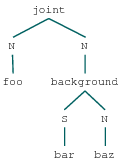

In [96]:
t('joint', [
        ('N', ['foo']),
        ('N', [
            ('background', [
                ('S', ['bar']),
                ('N', ['baz'])])]),
        ]
    )


In [ ]:
t('')

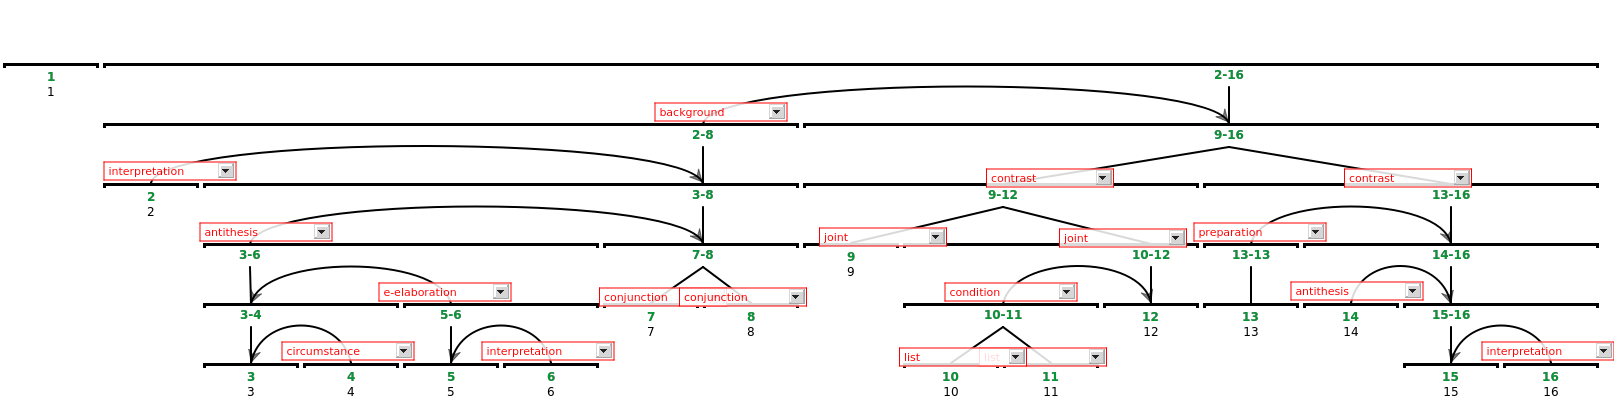

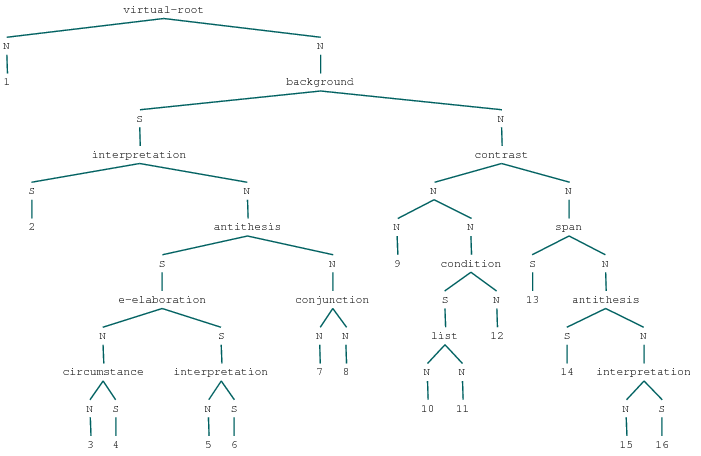

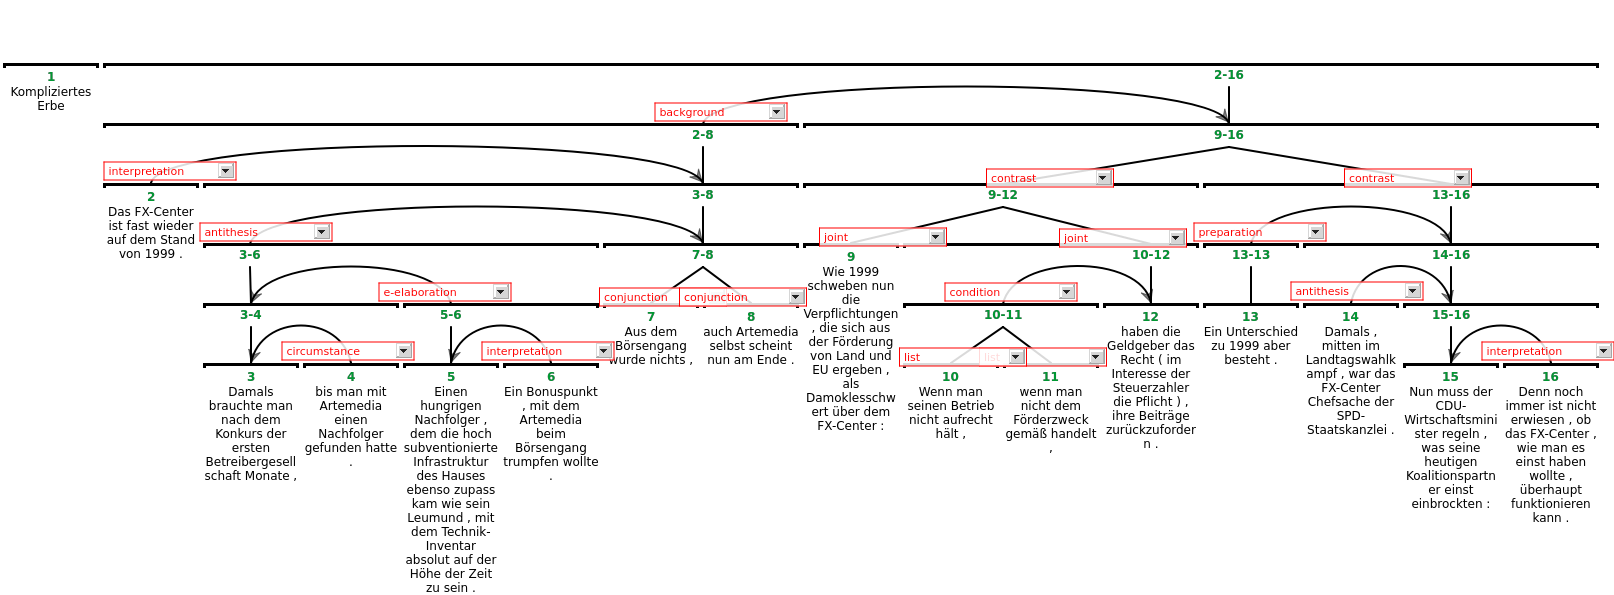

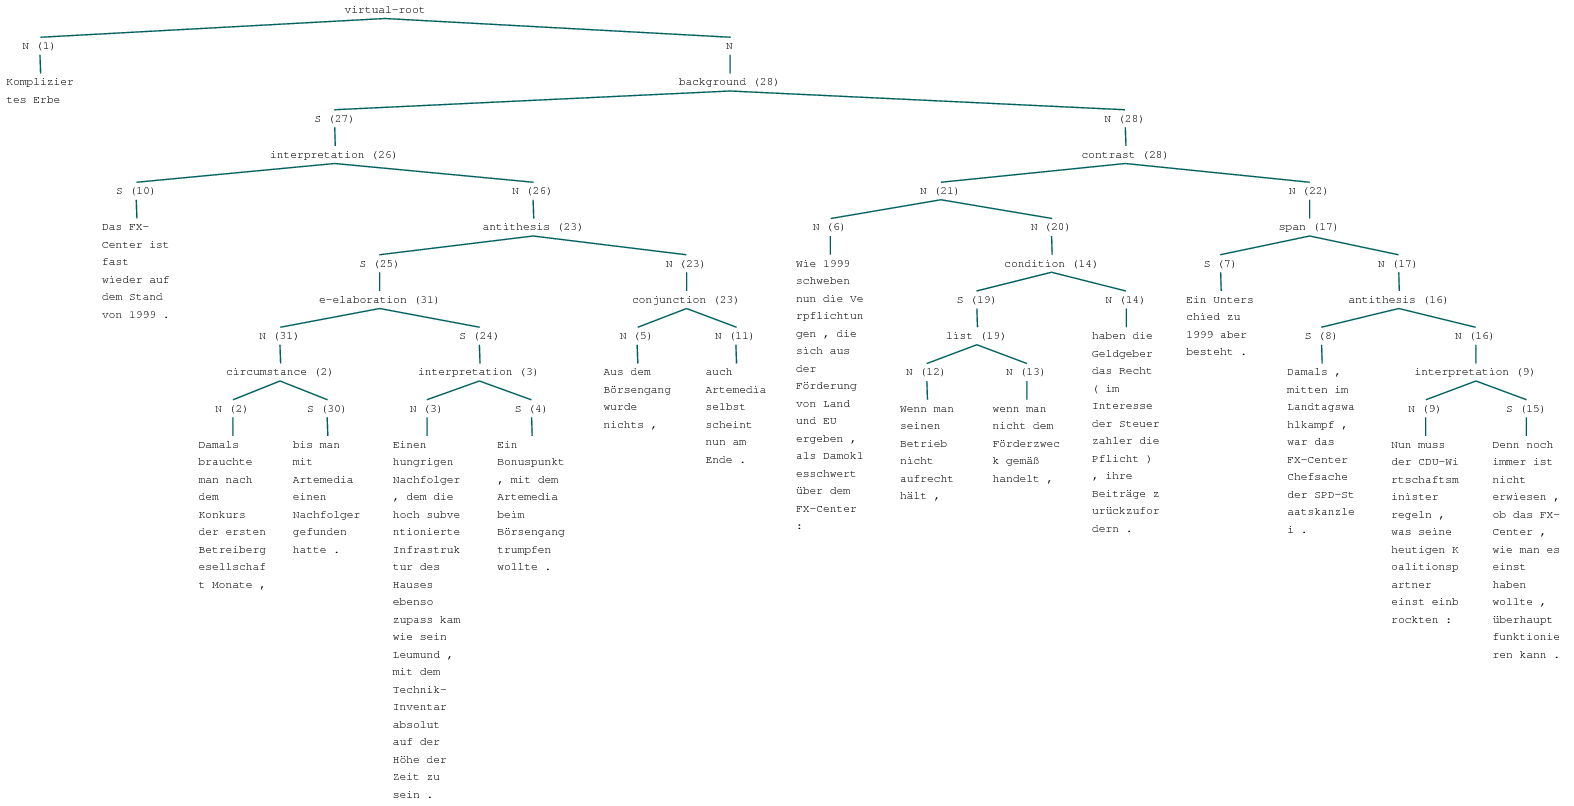

In [99]:
produced = rstviewer_vs_rsttree(
    'maz-11279-excerpt.rs3', rs3tree_dir=RS3TREE_DIR, word_wrap=10, debug=False)

produced = rstviewer_vs_rsttree(
    'maz-11279.rs3', rs3tree_dir=PCC_RS3_DIR, word_wrap=10, debug=True)

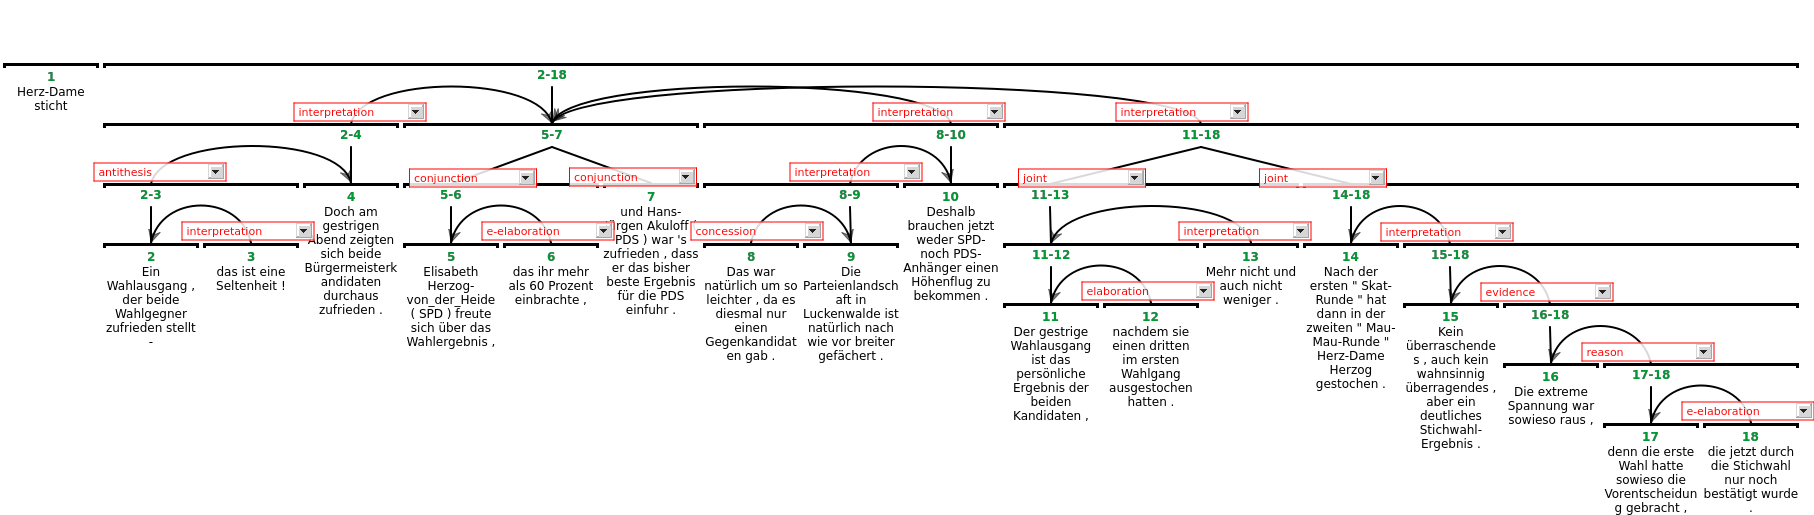

TooManyChildrenError: Can't parse a multinuc group (28) with more than 2 non-multinuc children: ['25', '30', '31']

In [102]:
produced = rstviewer_vs_rsttree('maz-14654.rs3', rs3tree_dir=PCC_RS3_DIR)

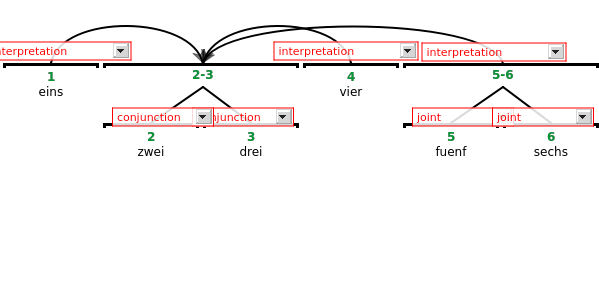

TooManyChildrenError: Can't parse a multinuc group (7) with more than 2 non-multinuc children: ['1', '4', '8']

In [115]:
rstviewer_vs_rsttree('multinuc-plus-two-satellites.rs3', rs3tree_dir=RS3TREE_DIR)

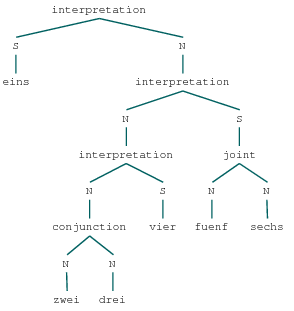

In [116]:
joint_5_6 = ('joint', [
    ('N', ['fuenf']),
    ('N', ['sechs'])
])

conj_2_3 = ('conjunction', [
    ('N', ['zwei']),
    ('N', ['drei'])
])

inter_2_4 = ('interpretation', [
    ('N', [conj_2_3]),
    ('S', ['vier'])
])

inter_2_6 = ('interpretation', [
    ('N', [inter_2_4]),
    ('S', [joint_5_6])])

t('interpretation', [
    ('S', ['eins']),
    ('N', [inter_2_6])
])

# TODO: fix root_id

## root_id is used to extract the relname, but it must never be span

## maz-11279: TODO: make small test case for non-root N w/out children

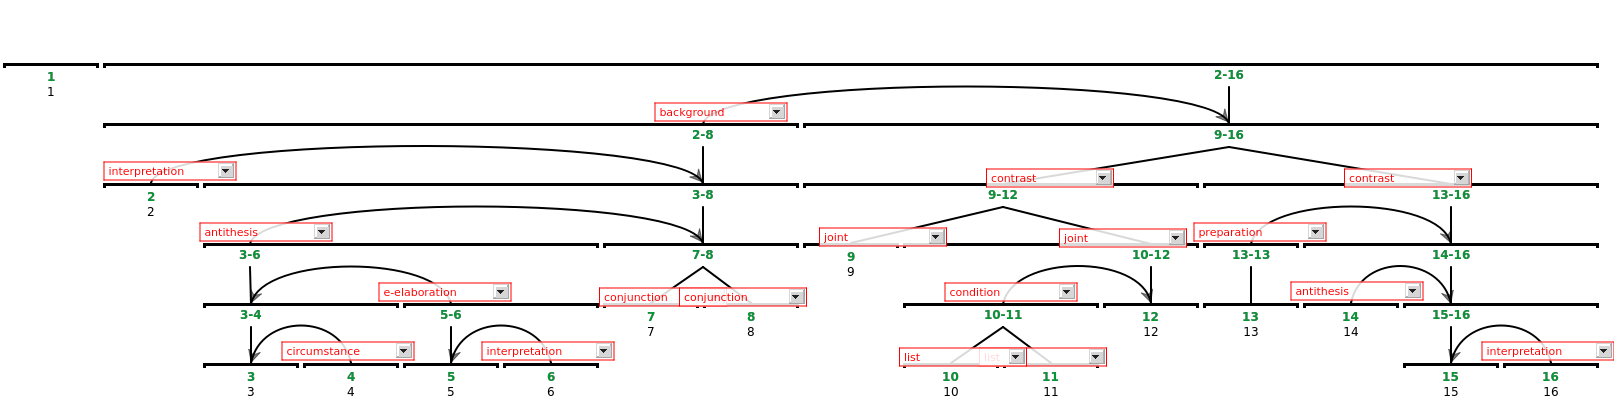

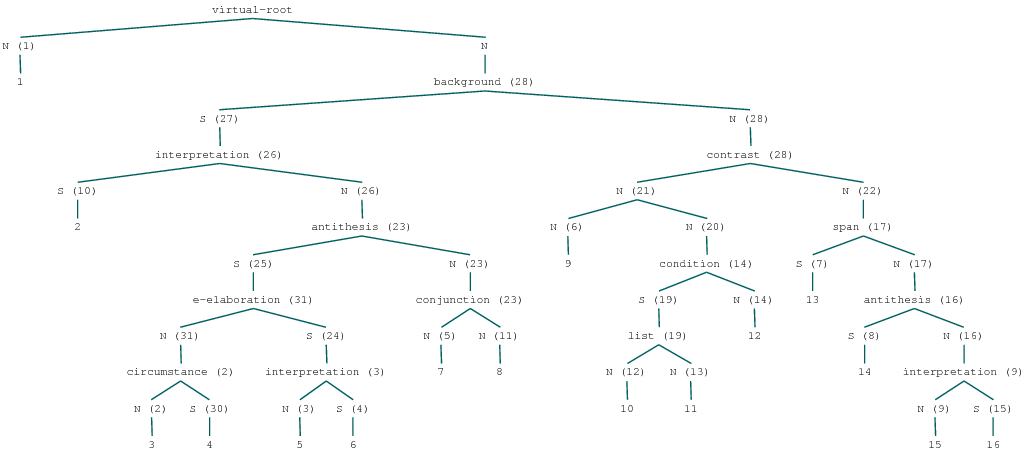

In [44]:
produced = rstviewer_vs_rsttree(
    'maz-11279-excerpt.rs3', rs3tree_dir=RS3TREE_DIR, word_wrap=10, debug=True)

## maz-6918: small FIXME: relations w/out debug label

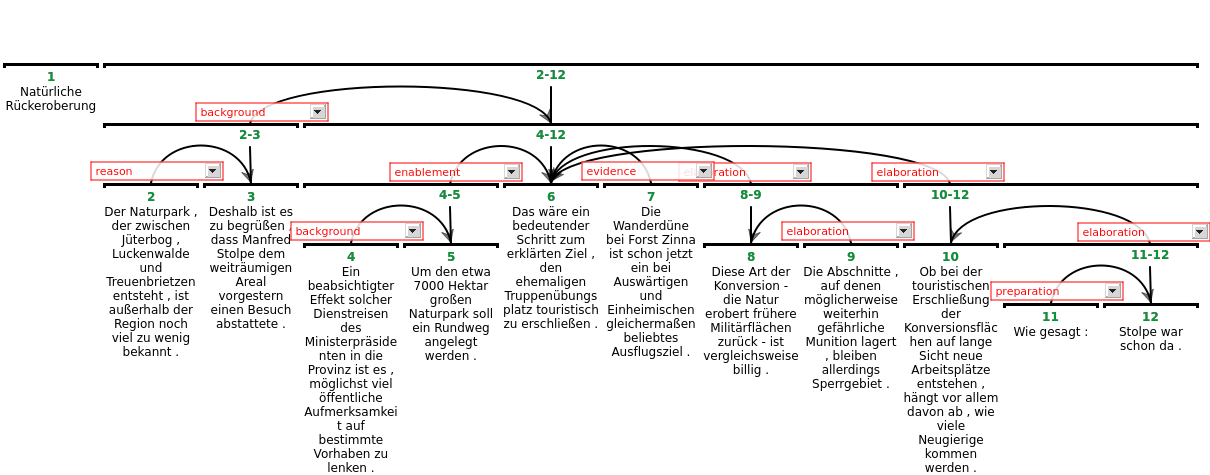

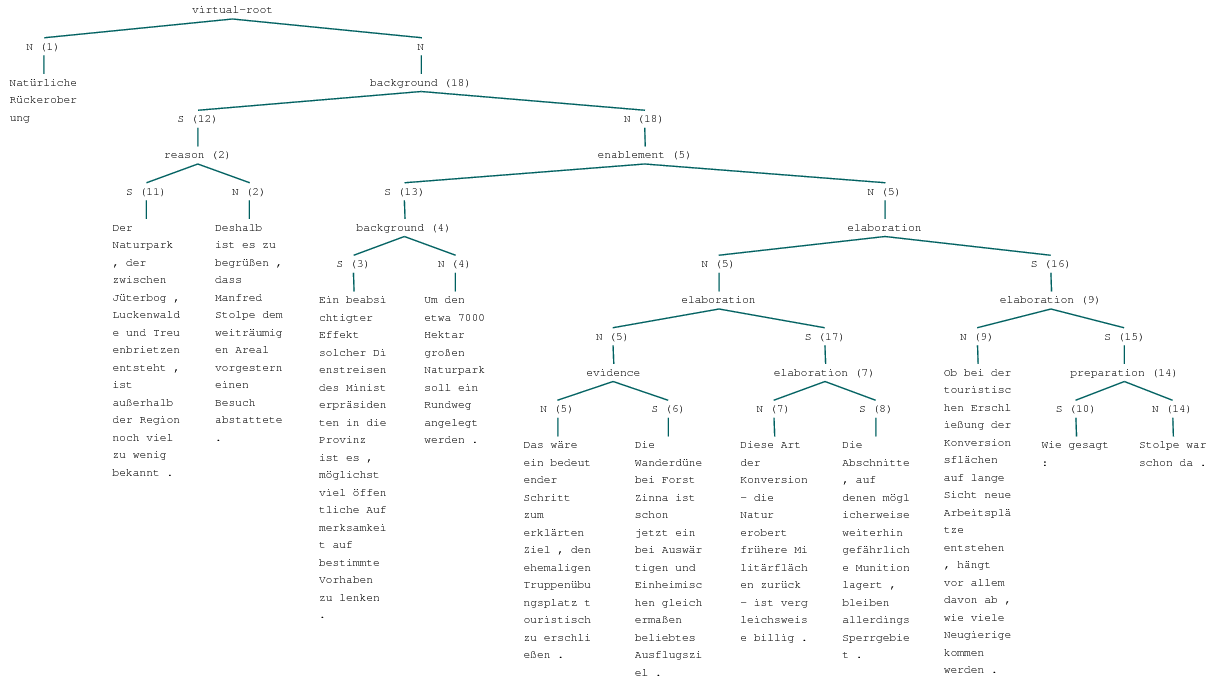

In [45]:
produced = rstviewer_vs_rsttree(
    'maz-6918.rs3', rs3tree_dir=PCC_RS3_DIR, word_wrap=10, debug=True)

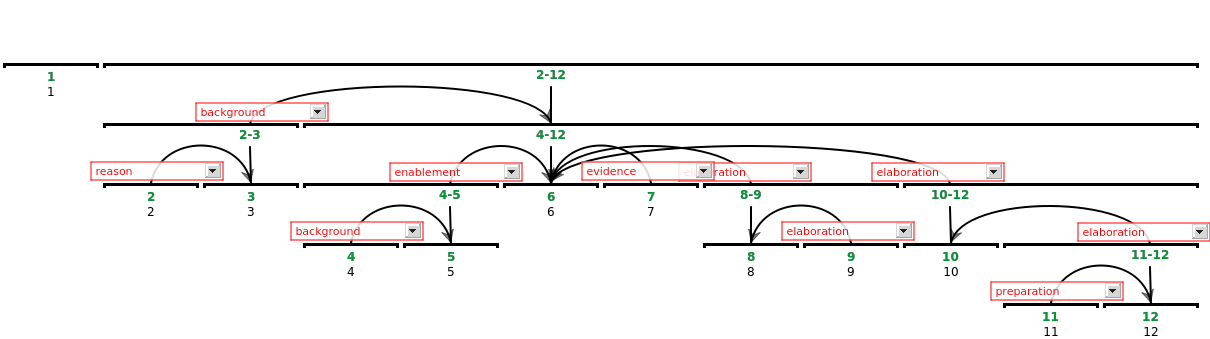

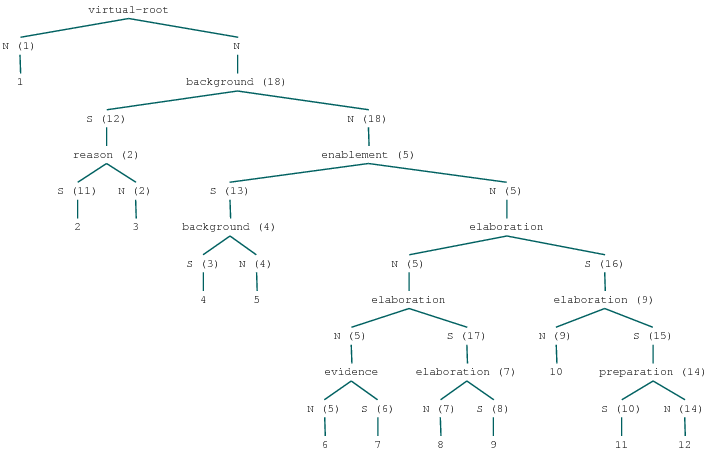

In [46]:
produced = rstviewer_vs_rsttree(
    'maz-6918-excerpt.rs3', rs3tree_dir=RS3TREE_DIR, word_wrap=10, debug=True)

## maz-00001.rs3

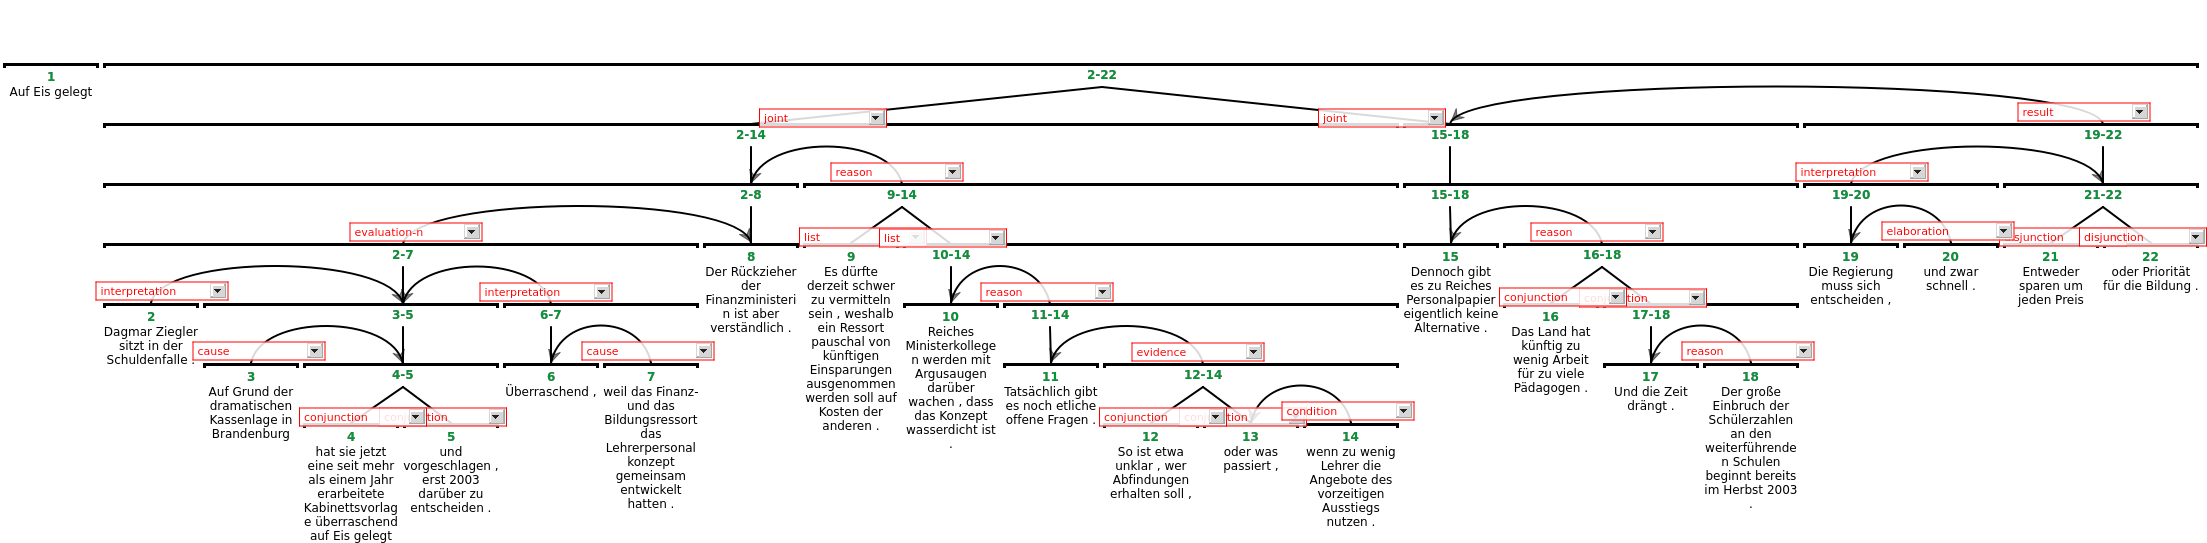

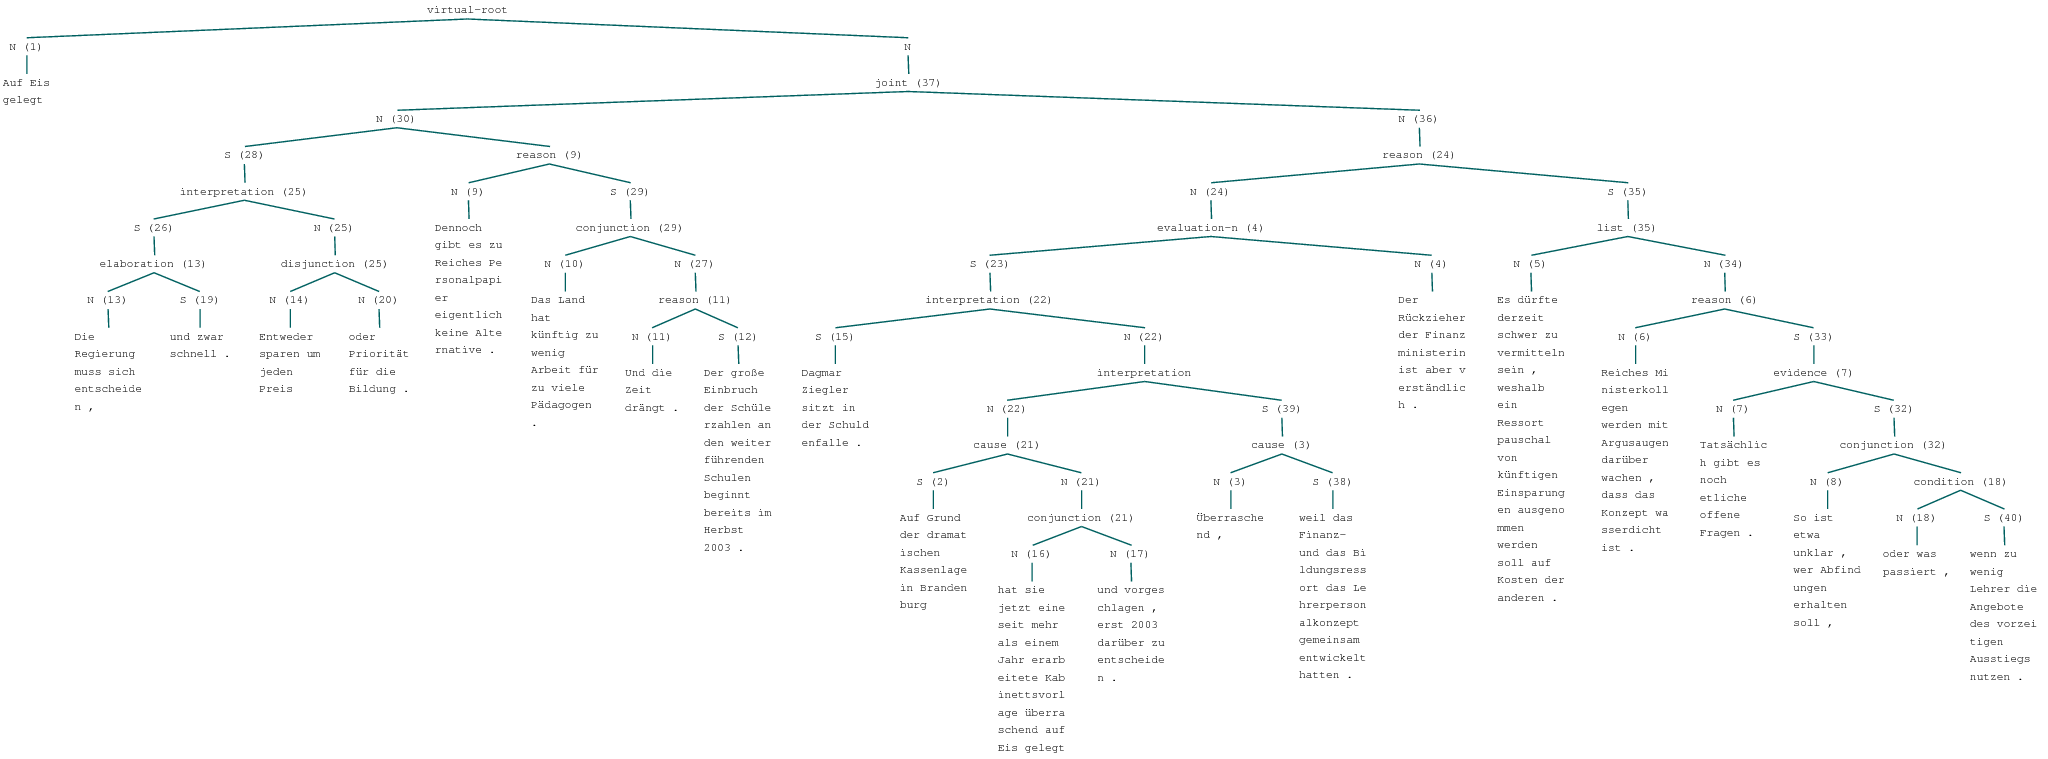

In [9]:
produced = rstviewer_vs_rsttree(
    'maz-00001.rs3', rs3tree_dir=PCC_RS3_DIR, word_wrap=10, debug=True)

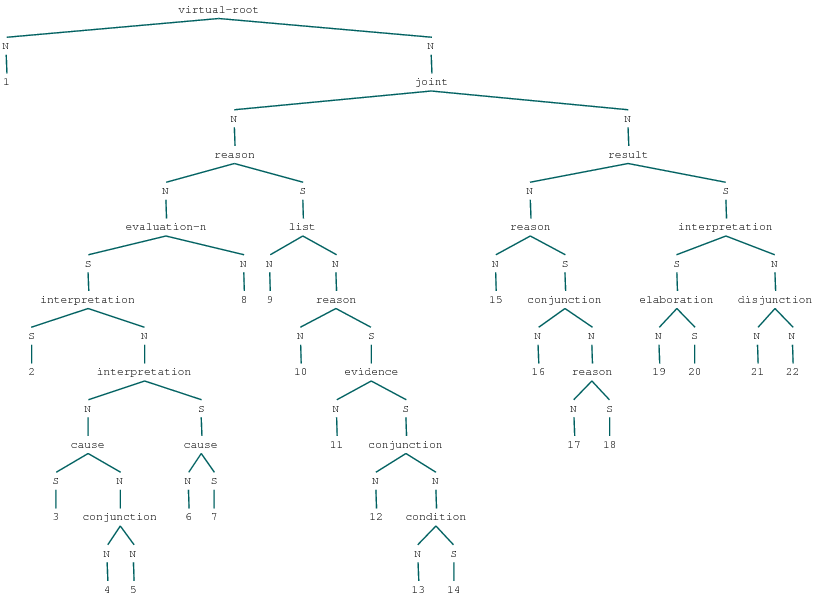

In [34]:
con_4_5 = ('conjunction', [
    n(['4']),
    n(['5'])
])

cause_3_5 = ('cause', [
    s(['3']),
    n([con_4_5])
])

cause_6_7 = ('cause', [
    n(['6']),
    s(['7'])
])

inter_3_7 = ('interpretation', [
    n([cause_3_5]),
    s([cause_6_7])
])

inter_2_7 = ('interpretation', [
    s(['2']),
    n([inter_3_7])
])

eval_2_8 = ('evaluation-n', [
    s([inter_2_7]),
    n(['8'])
])

cond_13_14 = ('condition', [
    n(['13']),
    s(['14'])
])

conj_12_14 = ('conjunction', [
    n(['12']),
    n([cond_13_14])
])

evidence_11_14 = ('evidence', [
    n(['11']),
    s([conj_12_14])
])

reason_10_14 = ('reason', [
    n(['10']),
    s([evidence_11_14])
])

list_9_14 = ('list', [
    n(['9']),
    n([reason_10_14])
])

reason_2_14 = ('reason', [
    n([eval_2_8]),
    s([list_9_14])
])

reason_17_18 = ('reason', [
    n(['17']),
    s(['18'])
])

conj_16_18 = ('conjunction', [
    n(['16']),
    n([reason_17_18])
])

reason_15_18 = ('reason', [
    n(['15']),
    s([conj_16_18])
])

elab_19_20 = ('elaboration', [
    n(['19']),
    s(['20'])
])

dis_21_22 = ('disjunction', [
    n(['21']),
    n(['22'])
])

inter_19_22 = ('interpretation', [
    s([elab_19_20]),
    n([dis_21_22])
])

result_15_22 = ('result', [
    n([reason_15_18]),
    s([inter_19_22])
])

joint_2_22 = ('joint', [
    n([reason_2_14]),
    n([result_15_22])
])

expected = t('virtual-root', [
    n(['1']),
    n([joint_2_22])
])

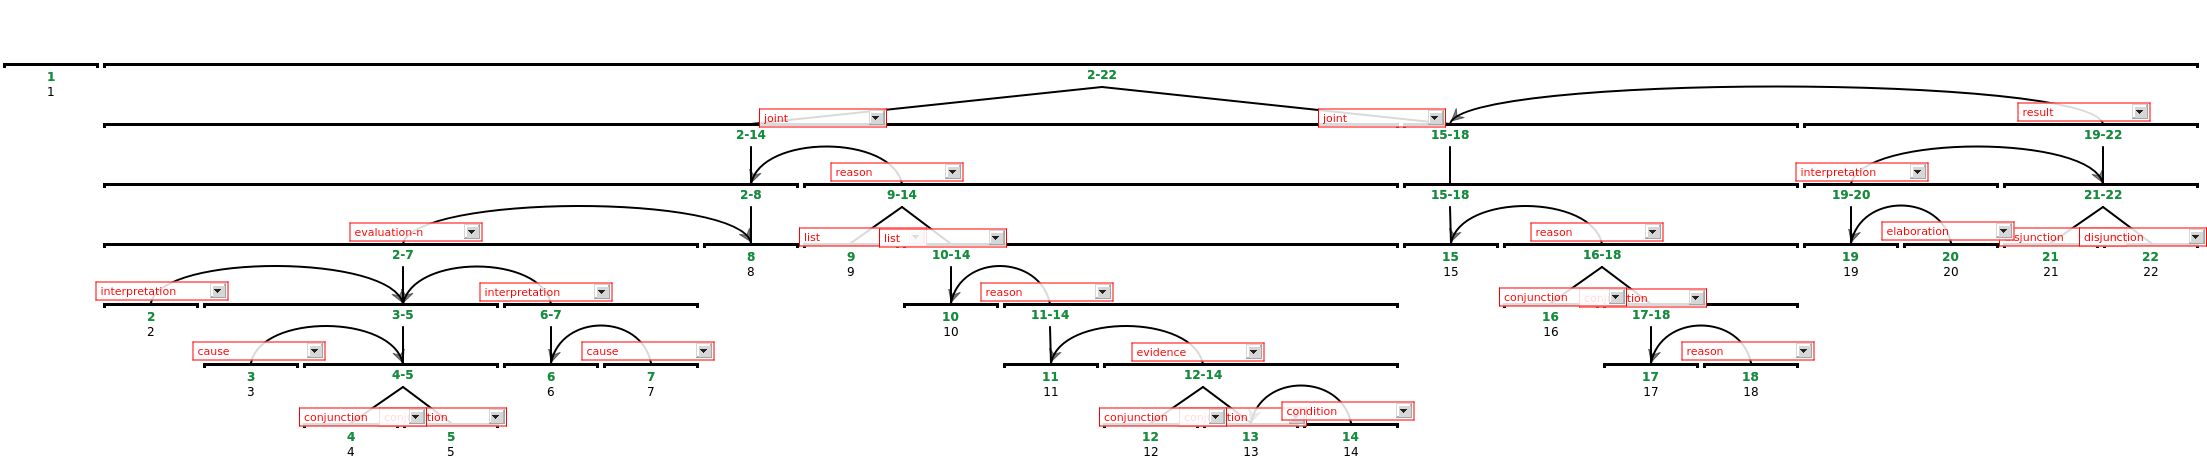

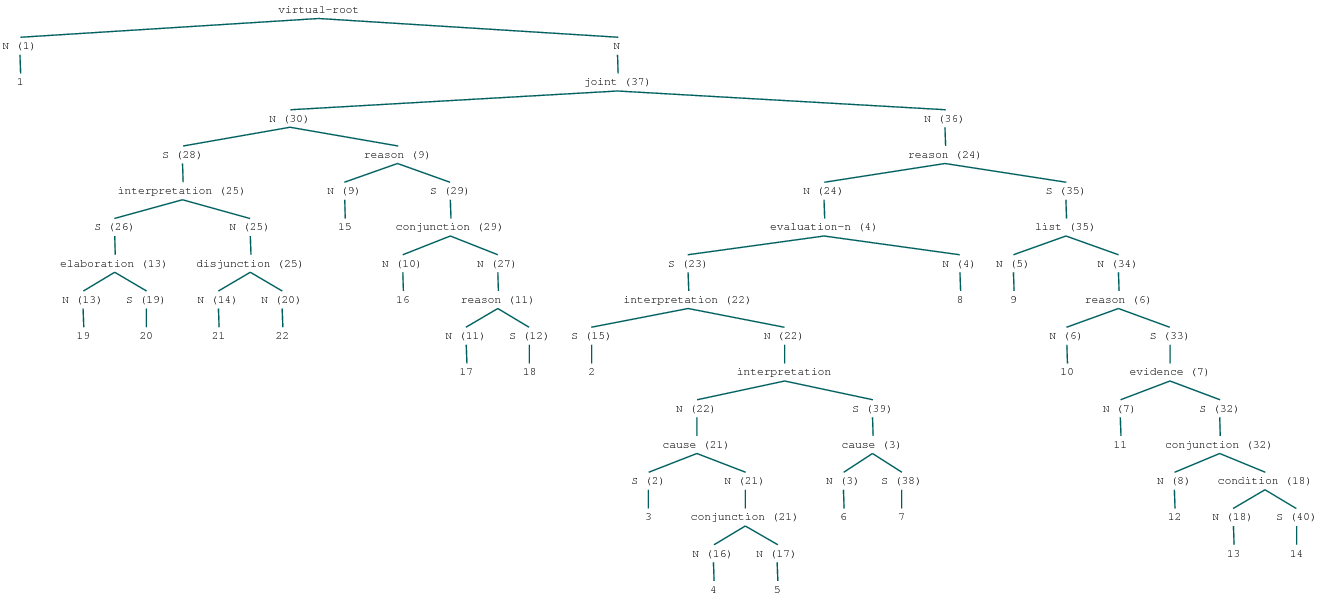

In [12]:
produced = rstviewer_vs_rsttree(
    'maz-00001-excerpt.rs3', rs3tree_dir=RS3TREE_DIR, word_wrap=10, debug=True)

## maz-14654.rs3

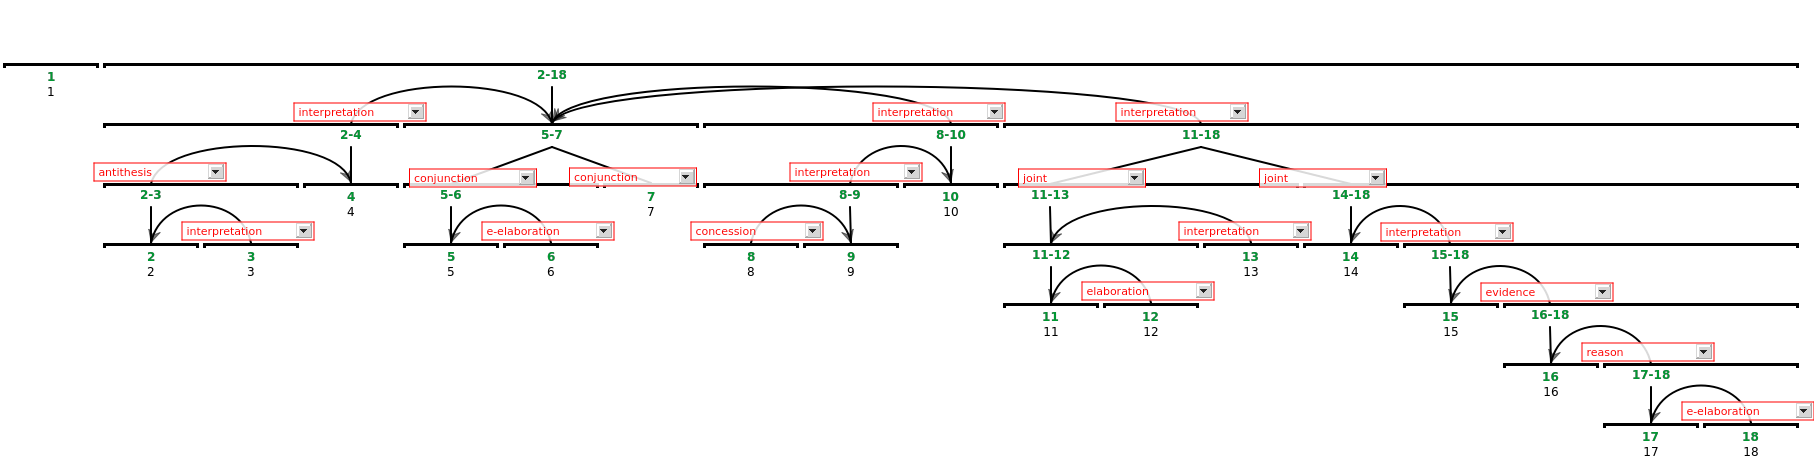

TooManyChildrenError: Can't parse a multinuc group (28) with more than 2 non-multinuc children: ['25', '30', '31']

In [11]:
"""
    194                     raise TooManyChildrenError(
    195                         "Can't parse a multinuc group (%s) with more than 2 non-multinuc children: %s" \
--> 196                             % (elem_id, other_child_ids))
    197 
    198             else:

TooManyChildrenError: Can't parse a multinuc group (28) with more than 2 non-multinuc children: ['25', '30', '31']
"""
produced = rstviewer_vs_rsttree(
    'maz-14654-excerpt.rs3', rs3tree_dir=RS3TREE_DIR, word_wrap=10, debug=True)